<a href="https://colab.research.google.com/github/akshithamaddi/SIGIR/blob/main/Deep_analysis_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Article_information.csv')
len(df)

4433

In [ ]:
df1 = pd.read_csv('Author_information.csv')
len(df1)

13518

In [ ]:
df2 = pd.read_csv('Citation_information.csv')
len(df2)

173453

In [ ]:
df3 = pd.read_csv('Reference_information.csv')
len(df3)

64130

In [ ]:
df.head(1)

,Unnamed: 0,Article_id,Venue,Title,Year,Abstract,Doi,fieldsOfStudy,topics,Downloadurl,TotalCitationCount,TotalDownloadCount,Influentialcitationcount
0,0,https://doi.org/10.1145/511285.511286,SIGIR '71,Introduction and perspectives for the 1971 ACM...,1971,introduction prospectives provided 1971 acm in...,10.1145/511285.511286,Computer Science,"Information retrieval,Document retrieval",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,0,222,0


In [ ]:
df[['TotalCitationCount', 'TotalDownloadCount', 'Influentialcitationcount']].describe()

,TotalCitationCount,Influentialcitationcount
count,4433.000000,4433.000000
mean,39.127679,4.242951
std,105.213782,15.130653
min,0.000000,0.000000
25%,2.000000,0.000000
50%,9.000000,0.000000
75%,34.000000,3.000000
max,3201.000000,584.000000


In [ ]:
#Most Chosen topics of all time
topics = df[['Article_id', 'Title', 'Year', 'fieldsOfStudy','topics']].sort_values('topics', ascending=False)[:15]

In [ ]:
from IPython.display import display, HTML
display(HTML(topics.to_html()))

,Article_id,Title,Year,fieldsOfStudy,topics
2705,https://doi.org/10.1145/2009916.2010087,Sample selection for dictionary-based corpus compression,2011,Computer Science,"zlib,Text corpus,Preprocessor,Requirement,Experiment,LZ77 and LZ78,Data dictionary,Microsoft Word for Mac,General-purpose markup language"
2500,https://doi.org/10.1145/2484028.2484162,Neighbourhood preserving quantisation for LSH,2013,Computer Science,"lsh,Locality-sensitive hashing,Feature vector,Quantization (physics),Affinity analysis,Locality of reference,Thresholding (image processing)"
2067,https://doi.org/10.1145/2348283.2348466,Effects of expertise differences in synchronous social Q&A,2012,Computer Science,"dialog,Real-time web"
4220,https://doi.org/10.1145/3331184.3331240,Video Dialog via Multi-Grained Convolutional Self-Attention Context Networks,2019,Computer Science,"dialog,Encoder,Natural language,Interaction,Experiment,Parallel computing,ENCODE,Random neural network"
2872,https://doi.org/10.1145/1571941.1572037,Query side evaluation: an empirical analysis of effectiveness and effort,2009,Computer Science,"Zipf's law,Information retrieval"
3638,https://doi.org/10.1145/2766462.2767846,Finding Answers in Web Search,2015,Computer Science,"Yahoo! Answers,Web search engine,Relevance,Crowdsourcing,Text Retrieval Conference,Web search query,Social media,Information needs,Web page,Question answering,Experiment,Ranking (information retrieval),Computer user satisfaction,Google Questions and Answers,Document,Functional genomics,Software quality,Phil Bernstein"
2612,https://doi.org/10.1145/2009916.2009975,Competition-based user expertise score estimation,2011,Computer Science,"Yahoo! Answers,PageRank,Link analysis,Question answering,Kernel density estimation"
3782,https://doi.org/10.1145/3077136.3080683,Mailbox-Based vs. Log-Based Query Completion for Mail Search,2017,Computer Science,"Yahoo Mail,Experiment,Web search engine,Quality of results"
3269,https://doi.org/10.1145/2911451.2911541,User Behavior in Asynchronous Slow Search,2016,Computer Science,"Xenon (program),Web search engine,Web search query,Usability testing,Baseline (configuration management),Relevance,Document,Entity–relationship model,Interaction"
3445,https://doi.org/10.1145/2911451.2911484,Time-Quality Trade-offs in Search,2016,Computer Science,"Xenon (program),Information retrieval,Algorithm"


In [ ]:
#Analyzing the articles published every year
year_df = pd.DataFrame(df['Year'].value_counts()).reset_index()
year_df.columns = ['Year', 'No.of articles']
year_df

,Year,No.of articles
0,2019,261
1,2017,253
2,2018,250
3,2011,237
4,2016,231
5,2014,228
6,2012,224
7,2007,217
8,2010,214
9,2013,212


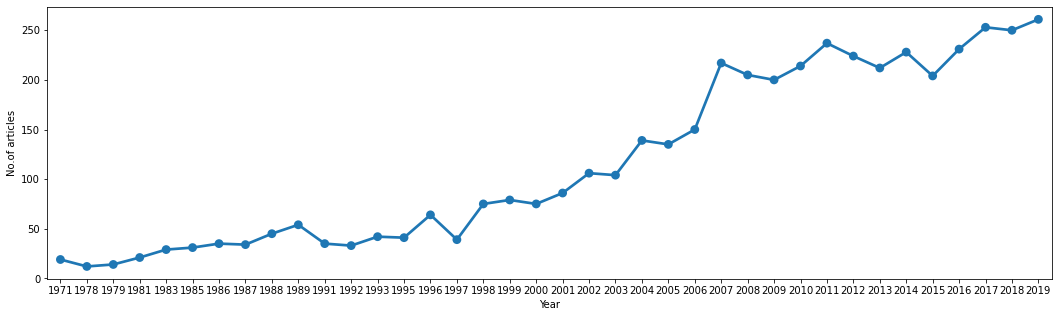

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Year', y='No.of articles', data=year_df)

In [ ]:
#Which field has the most number of articles
field_df = pd.DataFrame(df['fieldsOfStudy'].value_counts()).reset_index()
field_df.columns = ['Field', 'Articles']
field_df

,Field,Articles
0,Computer Science,4386
1,Computer Science Mathematics,18
2,Mathematics Computer Science,5
3,Computer Science Psychology,4
4,Computer Science Sociology,3
5,Computer Science Engineering,2
6,Sociology Computer Science,2
7,Engineering Computer Science,2
8,Computer Science Physics,2
9,Computer Science Medicine,2


In [ ]:
import pandas as pd 
df = pd.read_csv("Output.csv",usecols = ['art_title','bib_keywords'])
df1=pd.read_csv("Article_information.csv",usecols = ['Title','Year'])
df1.rename(columns = {'Title':'art_title'}, inplace = True) 
df1

,art_title,Year
0,Introduction and perspectives for the 1971 ACM...,1971
1,The function of semantics in automated languag...,1971
2,How features resolve syntactic ambiguity,1971
3,The converse natural language data management ...,1971
4,"CUE: a preprocessor system for restricted, nat...",1971
...,...,...
4428,Document Distance Metric Learning in an Intera...,2019
4429,Measuring Job Search Effectiveness,2019
4430,Informing the Design of Conversational IR Syst...,2019
4431,Evaluating Risk-Sensitive Text Retrieval,2019


In [ ]:
mergedStuff = pd.merge(df, df1, on=['art_title'], how='inner')
mergedStuff.to_csv("keywordswithyear.csv")
mergedStuff

,art_title,bib_keywords,Year
0,Relevance and contributing information types o...,"cognitive models and IR, embedding search with...",2000
1,INSYDER — an information assistant for busines...,"(semi) automated search assistants, UIs\&slash...",2000
2,Link-based and content-based evidential inform...,"IR models, content-based retrieval, exploiting...",2000
3,Evaluation of a simple and effective music inf...,"efficient search over non-textual information,...",2000
4,An experimental comparison of naive Bayesian a...,"evaluation (general), filtering\&slash;routing...",2000
...,...,...,...
3531,Querying XML using structures and keywords in ...,DBMS;XML;text,2003
3532,SE-LEGO: creating metasearch engines on demand,search engine;metasearch engine;metasearcher,2003
3533,MIND: resource selection and data fusion in mu...,data fusion;resource selection;networked retri...,2003
3534,Head/modifier pairs for everyone,linguistic phrases;linguistic resources;head/m...,2003


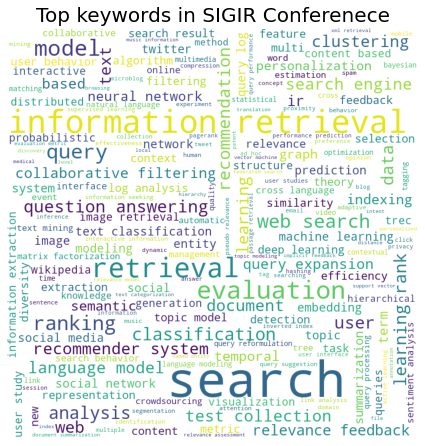

In [ ]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in mergedStuff.bib_keywords: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (6, 6), facecolor = None) 
plt.title("Top keywords in SIGIR Conferenece",fontsize=20)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
col_list = ["venue"]
df = pd.read_csv("Citation_Information.csv",usecols= col_list)
df.loc[df.venue.str.contains("SIGIR", na=False)] = 'SIGIR'
df1 = df['venue'].value_counts().to_frame().reset_index().rename(columns={'index':'venue', 'venue':'count'})
df2 = df1[:20].copy()
df2

,venue,count
0,SIGIR,9418
1,Inf. Process. Manag.,3169
2,ArXiv,2997
3,TREC,2898
4,TOIS,2517
5,J. Assoc. Inf. Sci. Technol.,2231
6,Information Retrieval,2100
7,ECIR,1678
8,CLEF,1501
9,IEEE Transactions on Knowledge and Data Engine...,1277


In [ ]:
df3 = df1[20:].copy()
s = pd.Series({'venue': 'Others', 'count': df3['count'].sum()}, 
                         index=df3.columns).fillna('')

df4 = df3.append(s, ignore_index=True)
entry = df4.loc[df4['venue'] == 'Others']

concat_df = pd.concat([df2,entry])
concat_df

,venue,count
0,SIGIR,9418
1,Inf. Process. Manag.,3169
2,ArXiv,2997
3,TREC,2898
4,TOIS,2517
5,J. Assoc. Inf. Sci. Technol.,2231
6,Information Retrieval,2100
7,ECIR,1678
8,CLEF,1501
9,IEEE Transactions on Knowledge and Data Engine...,1277


In [ ]:
#top 10 citation venues
import plotly.express as px
df = px.data.tips()
fig = px.pie(concat_df, values='count', names='venue', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
pip install scholarly

     |████████████████████████████████| 51kB 2.3MB/s 
     |████████████████████████████████| 2.9MB 4.4MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=7d5ef0a8d9d973682fb2cd5d085354342811913fce305e875f9e7aa0a2779c44
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for stem: filename=stem-1.8.0-cp36-none-any.whl size=436038 sha256=3763c4fb4a07b27311b5b857c97637b54aac073284d77f124c0b8d522ba4ec2c
  Stored in directory: /root/.cache/pip/wheels/02/3a/ee/1094b166e029353f892c0b121aa02f48aff5e658396924bc2a
  Created wheel for bibtexparser: filename=bibtexparser-1.2.0-cp36-none-any.whl size=36714 sha256=8a3f549588c58215840bceeff3484e106f6dc14c0acc8d0972885e70b57e656a
  Stored in directory: /root/.cache/pip/wheels/b2/5a/e7/867bcbc3a81c15b675b931aa19b6698375c5a5e90419a366db
Successfully built fake-useragent ste

In [ ]:
from scholarly import scholarly
search_query = scholarly.search_author('Jack Minker')
print(next(search_query))

{'affiliation': 'ACM Fellow, Jack and Rita Minker Professor of Computer '
                'Science, University of Maryland …',
 'citedby': 12199,
 'email': '@cs.umd.edu',
 'filled': False,
 'id': 'SQ1eGN4AAAAJ',
 'interests': ['Algorithms',
               'Game Theory',
               'Network Design',
               'Social Networks',
               'BIG Networks'],
 'name': 'MohammadTaghi Hajiaghayi',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=SQ1eGN4AAAAJ'}


In [ ]:
#total citations per year
import pandas as pd
df = pd.read_csv("Citation_Information.csv")
df.head(5)

,Unnamed: 0,article_id,authorid,authorname,authorurl,paperId,doi,title,venue,year,intent,isInfluential
0,0,10.1145/511285.511288,35022826.0,John A. Moyne,https://www.semanticscholar.org/author/35022826,8113edc6c95508bc7f9ae624903f8f4c98d3395b,10.1007/BF01007763,Relevance of computer science to linguistics a...,International Journal of Computer & Informatio...,1975.0,NaN,False
1,1,10.1145/511285.511288,40005703.0,Raoul N. Smith,https://www.semanticscholar.org/author/40005703,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973.0,NaN,False
2,2,10.1145/511285.511288,144226072.0,Edward Maxwell,https://www.semanticscholar.org/author/144226072,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973.0,NaN,False
3,3,10.1145/511285.511288,1777876.0,Jack Minker,https://www.semanticscholar.org/author/1777876,28dd43a10b78cc6297081fb7b9be86e114894391,10.1145/1095515.1095516,Information storage and retrieval: a survey an...,SIGF,1977.0,NaN,False
4,4,10.1145/511285.511288,48264726.0,George S. Dunham,https://www.semanticscholar.org/author/48264726,24f73ab2828f9aecbc079a9d5f5028c392eaa5b0,10.1002/asi.4630290207,Automatic indexing of pathology data,JASIS,1978.0,NaN,False


,Year,citations per year
0,2008.0,10581
1,2007.0,10504
2,2009.0,9910
3,2006.0,9659
4,2010.0,9507
5,2004.0,9505
6,2005.0,9206
7,2012.0,9131
8,2011.0,9073
9,2013.0,8501


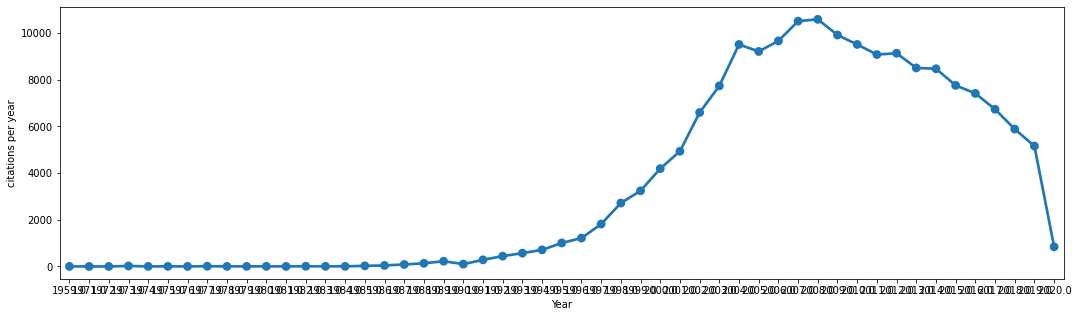

In [ ]:
#total citations per year
import matplotlib.pyplot as plt

year_df = pd.DataFrame(df['year'].value_counts()).reset_index()
year_df.columns = ['Year', 'citations per year']
plt.figure(figsize=(18,5))
sns.pointplot(x='Year', y='citations per year', data=year_df)
year_df

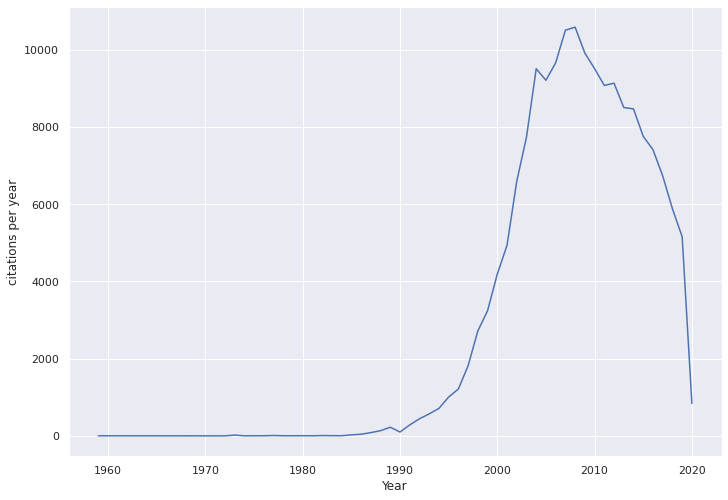

In [ ]:
#total citations for 10 years.
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Plot the responses for different events and regions
sns.lineplot(x="Year", y="citations per year",data=year_df)

In [ ]:
#2.Top 10 venues Numbers and Percentage of Proceedings cited.
import pandas as pd
import matplotlib.pyplot as plt
col_list = ["venue"]
df = pd.read_csv("Citation_Information_final.csv",usecols= col_list)
df.loc[df.venue.str.contains("SIGIR", na=False)] = 'SIGIR'
df1 = df['venue'].value_counts().to_frame().reset_index().rename(columns={'index':'venue', 'venue':'count'})
df2 = df1[:10].copy()
df1

,venue,count
0,SIGIR,9418
1,Inf. Process. Manag.,3169
2,ArXiv,2997
3,TREC,2898
4,TOIS,2517
...,...,...
5911,CHINZ '05,1
5912,AISec '13,1
5913,SIGMOD '85,1
5914,PhD@VLDB,1


In [ ]:
df3 = df1[10:].copy()
s = pd.Series({'venue': 'Others', 'count': df3['count'].sum()}, 
                         index=df3.columns).fillna('')

df4 = df3.append(s, ignore_index=True)
entry = df4.loc[df4['venue'] == 'Others']

concat_df = pd.concat([df2,entry])
concat_df['venue'] = concat_df['venue'].replace({'IEEE Transactions on Knowledge and Data Engineering':'IEEE TKDE'})
concat_df.to_csv("Top 10 citations venues.csv")


In [ ]:
import plotly.express as px
fig = px.pie(concat_df, values='count', names='venue', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
#2.Top 10 venues Numbers and Percentage of Proceedings refered.
import pandas as pd
import matplotlib.pyplot as plt
col_list = ["venue"]
df_ref = pd.read_csv("Reference_information.csv",usecols= col_list)
df_ref.loc[df_ref.venue.str.contains("SIGIR", na=False)] = 'SIGIR'
df1_ref = df_ref['venue'].value_counts().to_frame().reset_index().rename(columns={'index':'venue', 'venue':'count'})
df2_ref = df1_ref[:10].copy()
df1_ref

,venue,count
0,SIGIR,10698
1,TREC,1757
2,Inf. Process. Manag.,1272
3,NIPS,1107
4,TOIS,1093
...,...,...
3290,Biochemia medica,1
3291,Handbook of Discrete and Computational Geometr...,1
3292,IEEE transactions on pattern analysis and mach...,1
3293,J. Spatial Information Science,1


In [ ]:
df3_ref = df1_ref[10:].copy()
s = pd.Series({'venue': 'Others', 'count': df3_ref['count'].sum()}, 
                         index=df3_ref.columns).fillna('')

df4_ref = df3_ref.append(s, ignore_index=True)
entry = df4_ref.loc[df4_ref['venue'] == 'Others']

concat_df_ref= pd.concat([df2_ref,entry])
concat_df_ref.to_csv("top 10 reference venues.csv")

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values = concat_df['count'], labels = concat_df['venue'],
     domain=dict(x=[1.0, 0.5]),
     name = "Citations",title="Venues Cites SIGIR",titleposition = "bottom center"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values = concat_df_ref['count'], labels = concat_df_ref['venue'],
     domain=dict(x=[0.5, 1.0]),
     name="References",title="SIGIR References",titleposition = "bottom center"),
    row=1, col=2)
fig.show()


In [ ]:
#3.Number and percentage of proceedings cited in the SIGIR, 1971–2019
import pandas as pd
df_sigir = pd.read_csv("Citation_Information_final.csv")
df_sigir.loc[df_sigir['venue'].str.contains('SIGIR',na=False), 'venue'] = 'SIGIR'
df1 = df_sigir.loc[df_sigir['venue'] == 'SIGIR']

In [ ]:
year_sigir = pd.DataFrame(df1['year'].value_counts()).reset_index()
year_sigir.columns = ['Year', 'SIGIR citations per year']
sort_by_year = year_sigir.sort_values('Year')
sort_by_year.to_csv("Sigir_citations.csv")

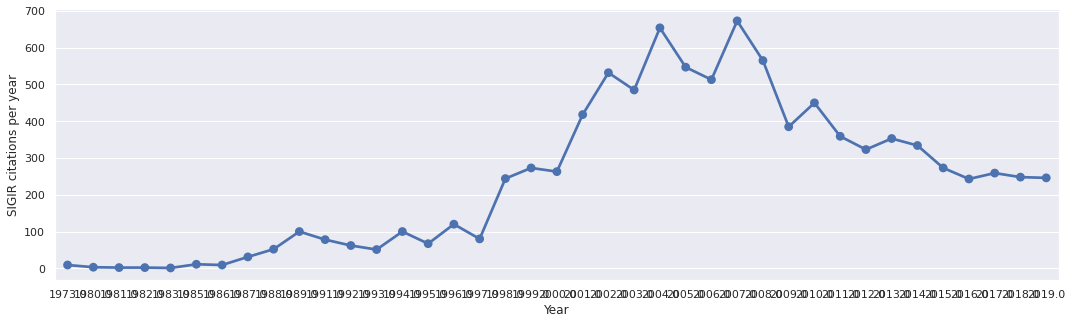

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Year', y='SIGIR citations per year', data=sort_by_year)

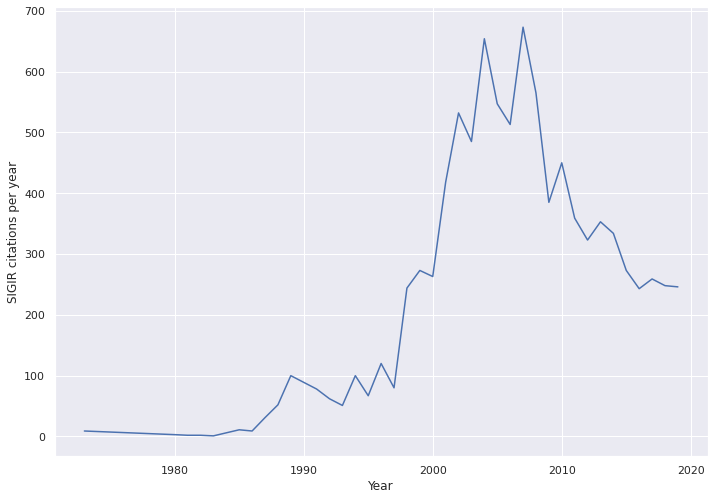

In [ ]:
##3.Number and percentage of proceedings cited in the SIGIR for every 10 years
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Plot the responses for different events and regions
sns.lineplot(x="Year", y="SIGIR citations per year",data=sort_by_year)

In [ ]:
#3.Number and percentage of proceedings cited in the non-SIGIR, 1971–2019
df_sigir = pd.read_csv("Citation_Information_final.csv")
df_sigir.loc[df_sigir['venue'].str.contains('SIGIR',na=False), 'venue'] = 'SIGIR'
df1 = df_sigir.loc[df_sigir['venue'] != 'SIGIR']

In [ ]:
year_sigir = pd.DataFrame(df1['year'].value_counts()).reset_index()
year_sigir.columns = ['Year', 'SIGIR citations per year']
non_sort_by_year = year_sigir.sort_values('Year')
non_sort_by_year.to_csv("Non_SIGIR_Citations.csv")

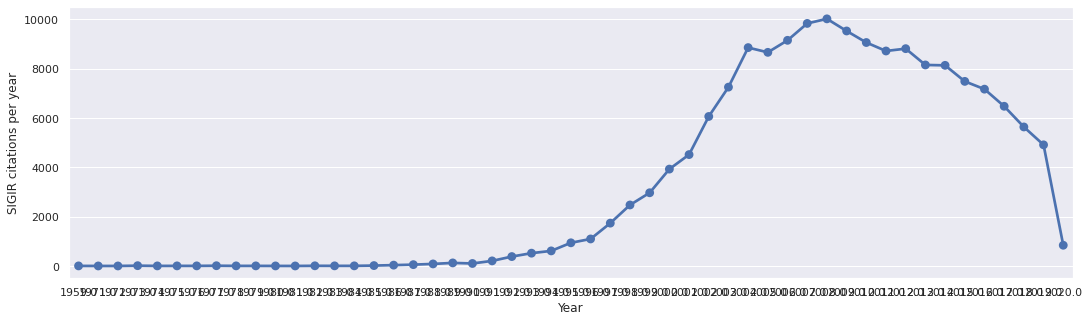

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Year', y='SIGIR citations per year', data=non_sort_by_year)

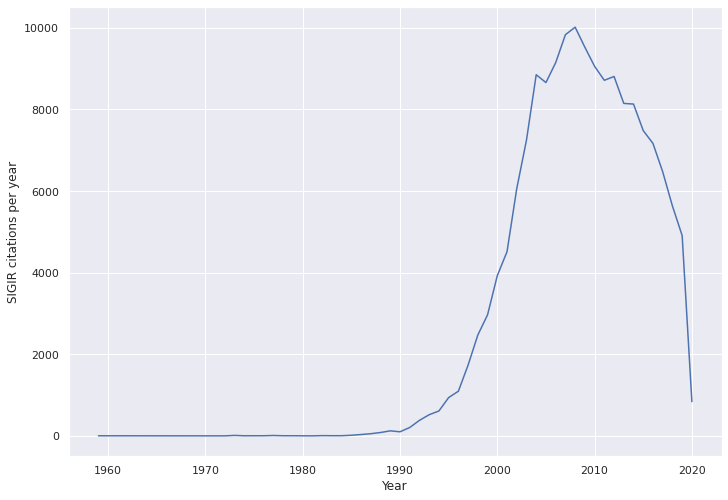

In [ ]:
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Plot the responses for different events and regions
sns.lineplot(x="Year", y="SIGIR citations per year",data=non_sort_by_year)

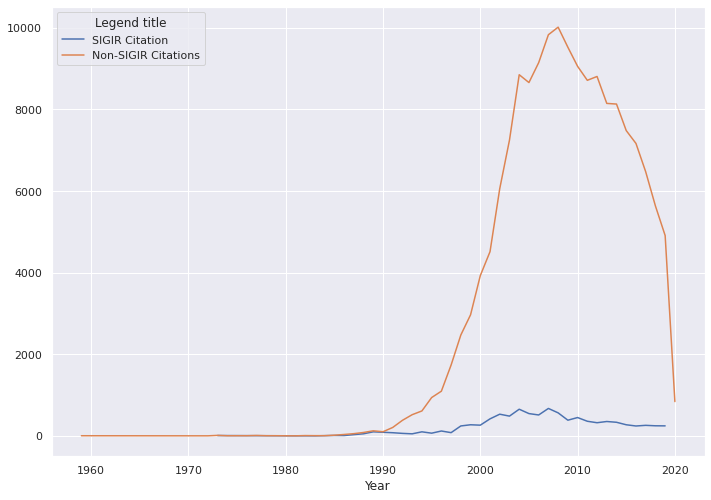

In [ ]:
#Comparision of SIGIR and Non-SIGIR CItations
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
sort_by_year.plot(kind='line', ax=ax,x="Year", y="SIGIR citations per year",label='SIGIR Citation')
non_sort_by_year.plot(kind='line', ax=ax, x="Year", y="SIGIR citations per year",label='Non-SIGIR Citations')
plt.gca().legend(title="Legend title")  # Changes
plt.show()

In [ ]:
#5.number of proceedings cited per paper SIGIR, 1971–2019.
import pandas as pd
citations_per_paper = pd.read_csv("Citation_Information.csv")
citations_per_paper1 = pd.DataFrame(citations_per_paper['title'].value_counts()).reset_index()
citations_per_paper1.columns = ['title','Citations per paper']
citations_per_paper1.head(10)

,title,Citations per paper
0,4th Workshop on Cross Lingual Information Acce...,312
1,Clia 2008 Cross Lingual Information Access (cl...,180
2,Preface Organizing Committee Program Committee...,171
3,Introduction to Information Retrieval: Relevan...,147
4,Machine Learning in Automated Text Categorizat...,116
5,Translation techniques in cross-language infor...,115
6,Towards effective strategies for monolingual a...,99
7,Bridging Text Visualization and Mining: A Task...,88
8,Adaptation of machine translation for multilin...,84
9,The effectiveness of automatically structured ...,84


In [ ]:
#5.Top most paper per each year
fields = ['title', 'year']
df = pd.read_csv('Citation_Information.csv', skipinitialspace=True, usecols=fields)
df['Citation count'] = df.groupby(['title'])['year'].transform('count')
df = df.drop_duplicates()
grouped_df = df.groupby("year")
maximums = grouped_df.max()
maximums = maximums.reset_index()
maximums

,year,title,Citation count
0,1959.0,Topic-oriented Term Extraction and Term Cluste...,4
1,1971.0,Expandable open addressing hash table storage ...,1
2,1972.0,Evaluation of an Interactive-Batch System Network,1
3,1973.0,The Solvability of the Decision Problem for Cl...,9
4,1974.0,Attribute based file organization in a paged m...,2
5,1975.0,TORUS - A Natural Language Understanding Syste...,3
6,1976.0,Performance of height-balanced trees,4
7,1977.0,Simple-english for data base communication,4
8,1978.0,CASDAL: <italic>CAS</italic>SM's <italic>DA</i...,3
9,1979.0,Semantic Checking Of Questions Expressed In Pr...,1


In [ ]:
#Reading the author table for data analysis
coauthordf = pd.read_csv("Citation_Information.csv")
coauthordf

,Unnamed: 0,article_id,authorid,authorname,authorurl,paperId,doi,title,venue,year,intent,isInfluential
0,0,10.1145/511285.511288,35022826.0,John A. Moyne,https://www.semanticscholar.org/author/35022826,8113edc6c95508bc7f9ae624903f8f4c98d3395b,10.1007/BF01007763,Relevance of computer science to linguistics a...,International Journal of Computer & Informatio...,1975.0,NaN,False
1,1,10.1145/511285.511288,40005703.0,Raoul N. Smith,https://www.semanticscholar.org/author/40005703,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973.0,NaN,False
2,2,10.1145/511285.511288,144226072.0,Edward Maxwell,https://www.semanticscholar.org/author/144226072,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973.0,NaN,False
3,3,10.1145/511285.511288,1777876.0,Jack Minker,https://www.semanticscholar.org/author/1777876,28dd43a10b78cc6297081fb7b9be86e114894391,10.1145/1095515.1095516,Information storage and retrieval: a survey an...,SIGF,1977.0,NaN,False
4,4,10.1145/511285.511288,48264726.0,George S. Dunham,https://www.semanticscholar.org/author/48264726,24f73ab2828f9aecbc079a9d5f5028c392eaa5b0,10.1002/asi.4630290207,Automatic indexing of pathology data,JASIS,1978.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175356,175356,10.1145/345508.345674,9106757.0,Daniel A. Keim,https://www.semanticscholar.org/author/9106757,c022253b7988d517a53f48edf5867b3b5557271d,10.1145/1459359.1459549,Personalized news video recommendation,ACM Multimedia,2008.0,methodology background,False
175357,175357,10.1145/345508.345674,2461423.0,Brian M. Dennis,https://www.semanticscholar.org/author/2461423,d4ce5e9394ecd2cb3e64bb952885a236e99f1fc5,10.1109/HICSS.2005.459,NusEye: Visualizing Network Structure to Suppo...,Proceedings of the 38th Annual Hawaii Internat...,2005.0,NaN,False
175358,175358,10.1145/345508.345674,3301216.0,Azzari Caillier Jarrett,https://www.semanticscholar.org/author/3301216,d4ce5e9394ecd2cb3e64bb952885a236e99f1fc5,10.1109/HICSS.2005.459,NusEye: Visualizing Network Structure to Suppo...,Proceedings of the 38th Annual Hawaii Internat...,2005.0,NaN,False
175359,175359,10.1145/345508.345674,2621218.0,Sandro Bauer,https://www.semanticscholar.org/author/2621218,04ab5ed3635a75bfd6b0c95598dbf38a1d4f63e8,10.18653/v1/D16-1259,Unsupervised Timeline Generation for Wikipedia...,EMNLP,2016.0,NaN,False


In [ ]:
#Authors and co authors for all the articles.
group = coauthordf.groupby('article_id')
df2 = group.apply(lambda x: x['authorname'].unique())
df2 = df2.apply(pd.Series)
df2 = df2.replace(np.nan, '', regex=True)
df2.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6211,6212,6213,6214,6215,6216,6217,6218,6219,6220,6221,6222,6223,6224,6225,6226,6227,6228,6229,6230,6231,6232,6233,6234,6235,6236,6237,6238,6239,6240,6241,6242,6243,6244,6245,6246,6247,6248,6249,6250
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1145/122860.122861,Tina J. Jayroe,Lars Langer,Erik Frøkjær,Christopher D. Manning,Prabhakar Raghavan,Hinrich Schütze,Jeffrey Dalton,Mario Taschwer,Chris Buckley,Ellen M. Voorhees,Tony Rose,Mark Stevenson,Miles Whitehead,Markus Borg,Guido Zuccon,Takashi Ohtsuka,Koji Eguchi,Hayato Yamana,Veronika Stefanov,John Tait,Ruben Costa,Bekir Taner Dinçer,Daniela Espinoza Molina,Heikki Keskustalo,Kalervo Järvelin,Ari Pirkola,Jaana Kekäläinen,Claire Fautsch,Mark Sanderson,W. Bruce Croft,Teresa Baldassarre,Marcelo Genero,Emilia Mendes,Mario Piattini,Lindiwe Mtshontsbi,Remko Liebregts,Drs A M Bogers,Van Zaanen,Drs T W,Thomas Place,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1145/122860.122862,Gonzalo Navarro,Ricardo A. Baeza-Yates,Airi Salminen,Frank Wm. Tompa,François Paradis,Su Yan,C. Lee Giles,Bernard J. Jansen,Swanston St Carlton,Mehdi Adda,Amel Hannech,Hamid Mcheick,Elaine Toms,Yuri Kagolovsky,Jochen R. Moehr,Timothy Arnold-Moore,Michael Fuller,Brian Lowe,James A. Thom,Ross Wilkinson,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1145/122860.122863,Yutao Guo,B. Shaparenko,Marti A. Hearst,Christian Plaunt,Marie-Francine Moens,Michael Bendersky,Oren Kurland,Swagata Duari,Vasudha Bhatnagar,Dr. Mohamed H. Haggag,Dr. Amal Abutabl,Ahmed Basil,Gerard Salton,James Allan,Amit Singhal,Daniel C. McKaughan,Eyal Krikon,Chris Buckley,Larry H. Smith,W. John Wilbur,Seung-Hoon Na,J. C. Scholtes,Marcin Kaszkiel,Justin Zobel,Ron Sacks-Davis,Farnoush Bayatmakou,Abbas Ahmadi,Azadeh Mohebi,Martin Choquette,Daniel Poulin,Paul Bratley,Peter Ingwersen,Tarek Mahfouz,Amr Kandil,Jimmy J. Lin,K. Tamsin Maxwell,Wu M. FullerDepartment,Benyah Shaparenko,Thorsten Joachims,Sushanta Kumar,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1145/122860.122864,Simon Gog,Alistair Moffat,Matthias Petri,Jeroen B. P. Vuurens,Quanzhi Li,Yi-fang Brook Wu,Razvan Stefan Bot,Xin Chen,Gagandeep Singh Narula,Vishal Jain,Lei Hou,Xiangyu Wang,AgentMing,- Hsuan Yang,Christopher C. Yang,Yi-ming,ChungBeckman,Hyoung-rae Kim,Philip K. Chan,Rebecca Green,Carol A. Bean,Sung-Hyon Myaeng,Bruno Pôssas,Nivio Ziviani,Berthier A. Ribeiro-Neto,Wagner Meira,Raman Chandrasekar,Srinivas Bangalore,Leif Azzopardi,Maarten de Rijke,Ellen Riloff,Donald Metzler,Michael Symonds,Ibrahim Aygul,Nihan Kesim Cicekli,Ilyas Cicekli,M. Shamim Khan,Sebastian W. Khor,Vijayaraghavan Bashyam,Ricky K. Taira,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1145/122860.122865,William S. Cooper,Fredric C. Gey,Daniel P. Dabney,Ingo Frommholz,Tong Zhang,Frank J. Oles,F. Fůhr,Stephan Hartmann,Gerhard Lustig,Konstadinos Tzeras,Gerhard Knorzy,Michael SchwantnerzTechnische,Fabio Crestani,Mounia Lalmas,C. J. van Rijsbergen,Iain Campbell,Henrik Nottelmann,Norbert Fuhr,Alessandro Rizzi,Michèle Vichy,Herbert Bock,Ludovic Lebart,Aynur A. Dayanik,David D. Lewis,David Madigan,Vladimir Menkov,Alexander Genkin,Ulrich Pfeifer,William A. Gale,Muhammad Kamran Abbasi,Mayy M. Al-Tahrawi,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1145/122860.122866,Christoph Baumgarten,Fabrizio Sebastiani,Pamela McCauley-Bush,Tareq Z. Ahram,Thorsten Joachims,Pamela McCauley,Waldemar Karwowski,Samuel Huston,Quan Wang,Yiu-Kai Ng,ChengXiang Zhai,John D. Lafferty,Norbert Fuhr,Donald Metzler,Günter Bachelier,Victor Lavrenko,Changki Lee,Gary Geunbae Lee,Warren R. Greiff,Jay M. Ponte,Xiang Zhang,Mingquan Zhou,Guohua Geng,Na Ye,Sascha Lorenz,Annie Y. S. Lau,Enrico W. Coiera,Alan Woodley,Dr. Charu C. Aggarwal,Consiglio,Osman Ali Sadek Ibrahim,Fabio Crestani,Mounia Lalmas,Charu C. Aggarwal,Roi Blanco,Paolo Boldi,David D. Lewis,William A. Gal

In [ ]:
pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=9ecff8a007117c0510fe3c8cf356e978d0e88a587575e7559ded47df7220ff0e
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [ ]:
#Automatic Keyword Extraction
import pandas as pd
from  rake_nltk import Rake  

r = Rake()    

df=pd.read_csv("Article_information.csv")


def rake_implement(x,r):
     r.extract_keywords_from_text(x)
     return r.get_ranked_phrases()

df['new_col'] =df['Title'].apply(lambda x: rake_implement(x,r))
print(df['new_col'])

0       [1971 acm information storage, retrieval sympo...
1       [automated language processing, semantics, fun...
2                  [features resolve syntactic ambiguity]
3       [converse natural language data management sys...
4       [preprocessor system, natural english, restric...
                              ...                        
4428    [document distance metric learning, interactiv...
4429                 [measuring job search effectiveness]
4430    [conversational ir systems, result presentatio...
4431          [sensitive text retrieval, evaluating risk]
4432    [effective text, active learning, efficient, a...
Name: new_col, Length: 4433, dtype: object


In [ ]:
#collaboration network
import networkx as nx
G = nx.Graph()
import pandas as pd
df1 = pd.read_csv("author1.csv")
#df2= df1.head(30)
G = nx.from_pandas_edgelist(df1, 'author', 'co_author')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)